# importing Libraries

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import train_test_split
# Assuming X and y are already defined
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from collections import Counter
import os
import pickle
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb
import pickle
from sklearn.tree import DecisionTreeRegressor
import json
from sklearn.metrics import log_loss
import scipy.stats as stats
from scipy.stats import ttest_rel

In [4]:
data= pd.read_csv("Downloads/fake_job_postings 2.csv")



# Data Preprocessing

In [6]:
#preprocessing Step 1: Dropping the id column
data.drop(columns="job_id", inplace=True)

In [7]:
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


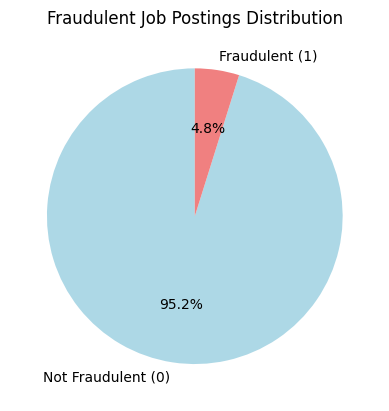

In [8]:
fraud_counts = data['fraudulent'].value_counts()

# Plotting pie chart to see distribution of positive and negative class
plt.figure()
plt.pie(fraud_counts, labels=['Not Fraudulent (0)', 'Fraudulent (1)'], autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Fraudulent Job Postings Distribution')
plt.show()

In [9]:
# Seperating Class attribute and training data
X = data.drop(columns='fraudulent') 
y = data['fraudulent']

#splitting the training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=0)

data_initial = pd.concat([X_train, y_train], axis=1)


In [10]:
data_initial

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
17016,Account Executive / Sales Rep,"US, AL, Birmingham",NaN,NaN,Network Closing Services has been serving Lend...,"Network Closing Services, Inc., a full service...",**Experienced candidates only**A successful ca...,"We provide a fun and rewarding atmosphere, our...",0,1,1,Full-time,Mid-Senior level,High School or equivalent,Real Estate,NaN,0
4766,Research Engineer - BigData / Cloud Computing,"IN, KA, Bangalore",Information Technology,NaN,Roland &amp; Associates is a Corporate Recruit...,Experience : 3 - 6 YearsMandatory Skills:Resea...,NaN,NaN,0,1,1,NaN,NaN,NaN,NaN,NaN,0
4515,.NET Web Developer,"NZ, N, Auckland",NaN,NaN,Tailor is a digital agency specialising in thr...,"We're looking for motivated, talented .NET web...","Technically, you'll have:Minimum 5 years of co...",NaN,0,1,1,NaN,NaN,NaN,NaN,NaN,0
16963,Software Engineer - Java/EDI Programmer,"US, FL, Tampa",NaN,NaN,NaN,Software Engineer-Java/EDINow Hiring Software ...,NaN,NaN,0,0,0,Full-time,Mid-Senior level,NaN,Hospital & Health Care,NaN,0
13931,Medium Duty Driver,"US, , All Locations",Operations,NaN,Our HistoryFounded in 1929 by Earl Bertrand Br...,Responsible for daily delivery of company prod...,"Essential Job FunctionsSelect, sort and verify...",NaN,0,1,1,NaN,NaN,NaN,NaN,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8267,"Clinic Assistant, North West London","GB, BEN, London",NaN,16000-18500,"Newmedica is a dynamic, innovative UK healthca...","Clinic Assistant, North West LondonCentral Mid...",GCSE grade C or above in English and Mathemati...,NaN,0,1,1,Full-time,Entry level,High School or equivalent,Hospital & Health Care,Customer Service,0
5791,Headhunter / Recruiter - Looking for Partner,"US, VA, Ashburn",NaN,NaN,HireHopes is the premier professional services...,HireHopes Consulting is looking for proven rec...,"We are not looking for employees, we are looki...",NaN,0,1,1,Full-time,Mid-Senior level,Unspecified,Human Resources,Business Development,0
7984,Customer Service / Support,"NZ, , Auckland",Success,50000-65000,"90 Seconds, the worlds Cloud Video Production ...",Our rapidly expanding business is looking for ...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,1,Full-time,Mid-Senior level,NaN,Marketing and Advertising,Project Management,0
6247,Senior Java developers (Java SE),"GR, I, Athens",NaN,NaN,Software Competitiveness International (SOFTCO...,Software Competitiveness International (SOFTCO...,NaN,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0


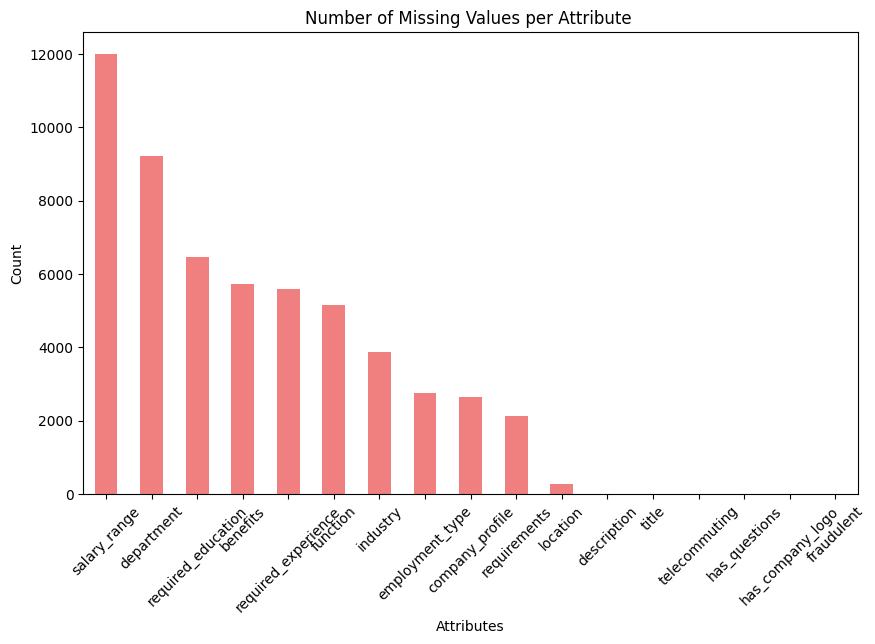

salary_range           11998
department              9210
required_education      6458
benefits                5737
required_experience     5591
function                5152
industry                3879
employment_type         2746
company_profile         2640
requirements            2127
location                 276
description                1
title                      0
telecommuting              0
has_questions              0
has_company_logo           0
fraudulent                 0
dtype: int64


In [11]:
#counting missing values from each row
missing_values_counts = data_initial.isna().sum()

# Sorting the missing values in descending order
missing_values_counts_sorted = missing_values_counts.sort_values(ascending=False)

# Plotting the bar plot for missing values
plt.figure(figsize=(10, 6))
missing_values_counts_sorted.plot(kind='bar', color='lightcoral')
plt.title('Number of Missing Values per Attribute ')
plt.ylabel('Count')
plt.xlabel('Attributes')
plt.xticks(rotation=45)
plt.show()

# Displaying the sorted missing values counts
print(missing_values_counts_sorted)


In [12]:
for column in data_initial.columns:
    print(f"Column '{column}' has data type: {data[column].dtype} and has {data[column].nunique()} values")

Column 'title' has data type: object and has 11231 values
Column 'location' has data type: object and has 3105 values
Column 'department' has data type: object and has 1337 values
Column 'salary_range' has data type: object and has 874 values
Column 'company_profile' has data type: object and has 1709 values
Column 'description' has data type: object and has 14801 values
Column 'requirements' has data type: object and has 11964 values
Column 'benefits' has data type: object and has 6203 values
Column 'telecommuting' has data type: int64 and has 2 values
Column 'has_company_logo' has data type: int64 and has 2 values
Column 'has_questions' has data type: int64 and has 2 values
Column 'employment_type' has data type: object and has 5 values
Column 'required_experience' has data type: object and has 7 values
Column 'required_education' has data type: object and has 13 values
Column 'industry' has data type: object and has 131 values
Column 'function' has data type: object and has 37 value

In [13]:

# preprocessing step 2: Creating function for impputing missing value
class FillMissingValues(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        
        return self
    
    def transform(self, X):
        return X.fillna('Unknown')


In [14]:
#calling imputer to fill the missing value
imputer=FillMissingValues()
data_clean=imputer.fit_transform(data_initial)

In [15]:
#checking the number of missing values after calling imputer
print(data_clean.shape)
data_clean.isna().sum()


(14304, 17)


title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

In [16]:
high_cardinality_cols = ['title', 'location', 'department', 'industry','salary_range','function']
# Descriptive columns to process
descriptive_columns = ['company_profile', 'description', 'requirements', 'benefits']

In [17]:
# Preprocessing Step 3: Create missing indicators for descriptive columns
class CreateMissingIndicators(BaseEstimator, TransformerMixin):
    def __init__(self, descriptive_columns):
        self.descriptive_columns = descriptive_columns
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for col in self.descriptive_columns:
            X[f'{col}_encoded'] = X[col].apply(lambda x: 1 if x != 'Unknown' else 0)
        return X



In [18]:
#Calling the function
Encoder=CreateMissingIndicators(descriptive_columns)
data_clean_encoded= Encoder.fit_transform(data_clean)

In [19]:
#Viewing data after preprocessing 
print(data_clean_encoded.shape)
data_clean_encoded.columns


(14304, 21)


Index(['title', 'location', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'company_profile_encoded', 'description_encoded',
       'requirements_encoded', 'benefits_encoded'],
      dtype='object')

In [20]:
#preprocessing Step 4: vectorization of textual data
class VectorizeDescriptiveText(BaseEstimator, TransformerMixin):
    def __init__(self, descriptive_columns, max_features=20, common_words=None):
        self.descriptive_columns = descriptive_columns
        self.max_features = max_features
        self.common_words = common_words
        self.vectorizer = None  

    def fit(self, X, y=None):
        # Combining all descriptive text attributes into one column
        X['combined_text'] = X[self.descriptive_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # Combining the list of stopwords
        exclude_words = list(ENGLISH_STOP_WORDS.union(self.common_words)) if self.common_words else list(ENGLISH_STOP_WORDS)
        exclude_words.append('industry')
        
        # Initialize the vectorizer for fitting the data
        self.vectorizer = TfidfVectorizer(max_features=self.max_features, stop_words=exclude_words)
        self.vectorizer.fit(X['combined_text'])
        
        return self

    def transform(self, X):
        if self.vectorizer is None:
            raise ValueError("fit has not been called before transform")
        
        # Combining all descriptive text attributes into one column
        X['combined_text'] = X[self.descriptive_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
        
        # using the fitted vectorizer transforming the sata
        text_vectors = self.vectorizer.transform(X['combined_text'])
        text_vectors_dense = text_vectors.toarray()
        feature_names = self.vectorizer.get_feature_names_out()
        tfidf_df = pd.DataFrame(text_vectors_dense, columns=feature_names)
        
        # Dropping the combined text column and original descriptive columns
        X = X.drop(columns=self.descriptive_columns + ['combined_text'])
        
        # Resetting index and concatenating the vecotrized features with the original features
        X_reset = X.reset_index(drop=True)
        tfidf_df_reset = tfidf_df.reset_index(drop=True)
        Ndf = pd.concat([X_reset, tfidf_df_reset], axis=1)
        
        return Ndf

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

In [21]:
#Exploratory Data Analysis:Function to get top N most frequent words
def get_top_words(text_series, stop_words=None, top_n=50):
    
    if stop_words is None:
        stop_words = []

    # Combininf all text in the series
    all_text = ' '.join(text_series)
    
    
    words = all_text.split()
    words = [word.lower() for word in words if word.lower() not in stop_words]
    
    # Counting the most common words
    word_counts = Counter(words)
    return word_counts.most_common(top_n)

In [22]:
# Split the data into fraudulent and non-fraudulent
fraudulent_df = data_clean[data_clean['fraudulent'] == 1]
non_fraudulent_df = data_clean[data_clean['fraudulent'] == 0]

# Combining the textual data of both the classes
fraudulent_text = fraudulent_df[descriptive_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)
non_fraudulent_text = non_fraudulent_df[descriptive_columns].apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

# Get the top 20 most frequent words for fraudulent and non-fraudulent postings
top_fraudulent_words = get_top_words(fraudulent_text, stop_words=ENGLISH_STOP_WORDS)
top_non_fraudulent_words = get_top_words(non_fraudulent_text, stop_words=ENGLISH_STOP_WORDS)

fraudulent_df = pd.DataFrame(top_fraudulent_words, columns=['Word', 'Frequency'])
non_fraudulent_df = pd.DataFrame(top_non_fraudulent_words, columns=['Word', 'Frequency'])

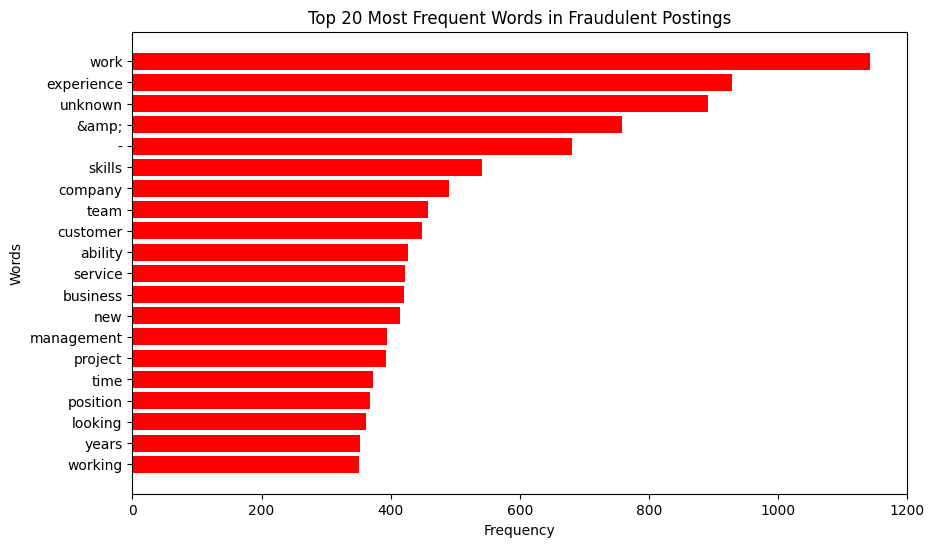

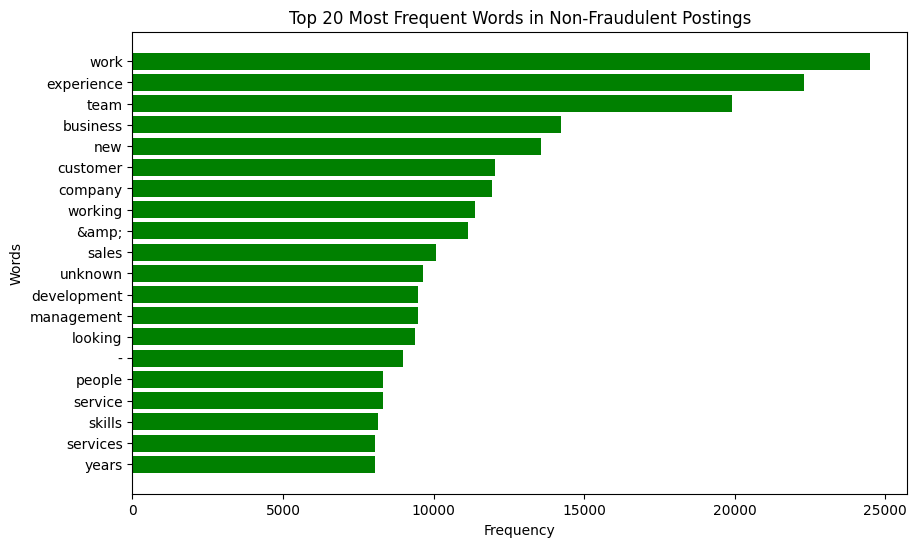

In [23]:
# Plotting the bar plot for fraudulent postings
plt.figure(figsize=(10, 6))
plt.barh(fraudulent_df['Word'][:20], fraudulent_df['Frequency'][:20], color='red')
plt.title('Top 20 Most Frequent Words in Fraudulent Postings')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

# Plotting the bar plot for non-fraudulent postings
plt.figure(figsize=(10, 6))
plt.barh(non_fraudulent_df['Word'][:20], non_fraudulent_df['Frequency'][:20], color='green')
plt.title('Top 20 Most Frequent Words in Non-Fraudulent Postings')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top
plt.show()

In [24]:
# Extract just the words from the top tuples
fraudulent_words = {word for word, _ in top_fraudulent_words}
non_fraudulent_words = {word for word, _ in top_non_fraudulent_words}

# Find common words between fraudulent and non-fraudulent postings
common_words = fraudulent_words.intersection(non_fraudulent_words)

print("Common words:", common_words)

Common words: {'knowledge', 'years', 'management', 'new', 'quality', 'experience', 'provide', 'communication', 'data', 'customer', 'project', 'job', 'team', 'high', 'working', 'company', 'support', 'skills', 'business', 'ability', 'design', '&amp;', 'help', 'technical', 'work', 'strong', 'looking', 'technology', 'people', 'sales', 'solutions', 'unknown', '-', 'services', 'including', 'development', 'service', 'time', 'product'}


In [25]:
vectorizer= VectorizeDescriptiveText(descriptive_columns, max_features=20, common_words=common_words)
vectorized_data=vectorizer.fit_transform(data_clean_encoded)
print(vectorized_data.shape)

/Users/tusharm/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amp'] not in stop_words.
  warnings.warn(


(14304, 37)


In [26]:
data_clean_encoded

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,...,required_experience,required_education,industry,function,fraudulent,company_profile_encoded,description_encoded,requirements_encoded,benefits_encoded,combined_text
17016,Account Executive / Sales Rep,"US, AL, Birmingham",Unknown,Unknown,Network Closing Services has been serving Lend...,"Network Closing Services, Inc., a full service...",**Experienced candidates only**A successful ca...,"We provide a fun and rewarding atmosphere, our...",0,1,...,Mid-Senior level,High School or equivalent,Real Estate,Unknown,0,1,1,1,1,Network Closing Services has been serving Lend...
4766,Research Engineer - BigData / Cloud Computing,"IN, KA, Bangalore",Information Technology,Unknown,Roland &amp; Associates is a Corporate Recruit...,Experience : 3 - 6 YearsMandatory Skills:Resea...,Unknown,Unknown,0,1,...,Unknown,Unknown,Unknown,Unknown,0,1,1,0,0,Roland &amp; Associates is a Corporate Recruit...
4515,.NET Web Developer,"NZ, N, Auckland",Unknown,Unknown,Tailor is a digital agency specialising in thr...,"We're looking for motivated, talented .NET web...","Technically, you'll have:Minimum 5 years of co...",Unknown,0,1,...,Unknown,Unknown,Unknown,Unknown,0,1,1,1,0,Tailor is a digital agency specialising in thr...
16963,Software Engineer - Java/EDI Programmer,"US, FL, Tampa",Unknown,Unknown,Unknown,Software Engineer-Java/EDINow Hiring Software ...,Unknown,Unknown,0,0,...,Mid-Senior level,Unknown,Hospital & Health Care,Unknown,0,0,1,0,0,Unknown Software Engineer-Java/EDINow Hiring S...
13931,Medium Duty Driver,"US, , All Locations",Operations,Unknown,Our HistoryFounded in 1929 by Earl Bertrand Br...,Responsible for daily delivery of company prod...,"Essential Job FunctionsSelect, sort and verify...",Unknown,0,1,...,Unknown,Unknown,Unknown,Other,0,1,1,1,0,Our HistoryFounded in 1929 by Earl Bertrand Br...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8267,"Clinic Assistant, North West London","GB, BEN, London",Unknown,16000-18500,"Newmedica is a dynamic, innovative UK healthca...","Clinic Assistant, North West LondonCentral Mid...",GCSE grade C or above in English and Mathemati...,Unknown,0,1,...,Entry level,High School or equivalent,Hospital & Health Care,Customer Service,0,1,1,1,0,"Newmedica is a dynamic, innovative UK healthca..."
5791,Headhunter / Recruiter - Looking for Partner,"US, VA, Ashburn",Unknown,Unknown,HireHopes is the premier professional services...,HireHopes Consulting is looking for proven rec...,"We are not looking for employees, we are looki...",Unknown,0,1,...,Mid-Senior level,Unspecified,Human Resources,Business Development,0,1,1,1,0,HireHopes is the premier professional services...
7984,Customer Service / Support,"NZ, , Auckland",Success,50000-65000,"90 Seconds, the worlds Cloud Video Production ...",Our rapidly expanding business is looking for ...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,...,Mid-Senior level,Unknown,Marketing and Advertising,Project Management,0,1,1,1,1,"90 Seconds, the worlds Cloud Video Production ..."
6247,Senior Java developers (Java SE),"GR, I, Athens",Unknown,Unknown,Software Competitiveness International (SOFTCO...,Software Competitiveness International (SOFTCO...,Unknown,Unknown,0,1,...,Unknown,Unknown,Unknown,Unknown,0,1,1,0,0,Software Competitiveness International (SOFTCO...


In [27]:
vectorized_data

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,...,office,opportunity,position,process,products,required,role,software,web,world
0,Account Executive / Sales Rep,"US, AL, Birmingham",Unknown,Unknown,0,1,1,Full-time,Mid-Senior level,High School or equivalent,...,0.205882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Research Engineer - BigData / Cloud Computing,"IN, KA, Bangalore",Information Technology,Unknown,0,1,1,Unknown,Unknown,Unknown,...,0.525382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,.NET Web Developer,"NZ, N, Auckland",Unknown,Unknown,0,1,1,Unknown,Unknown,Unknown,...,0.147820,0.137729,0.137587,0.000000,0.000000,0.000000,0.000000,0.000000,0.766454,0.000000
3,Software Engineer - Java/EDI Programmer,"US, FL, Tampa",Unknown,Unknown,0,0,0,Full-time,Mid-Senior level,Unknown,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.181457,0.205731,0.820215,0.212018,0.000000
4,Medium Duty Driver,"US, , All Locations",Operations,Unknown,0,1,1,Unknown,Unknown,Unknown,...,0.000000,0.241331,0.241081,0.000000,0.267172,0.574704,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,"Clinic Assistant, North West London","GB, BEN, London",Unknown,16000-18500,0,1,1,Full-time,Entry level,High School or equivalent,...,0.362339,0.000000,0.000000,0.000000,0.373754,0.321587,0.000000,0.000000,0.000000,0.000000
14300,Headhunter / Recruiter - Looking for Partner,"US, VA, Ashburn",Unknown,Unknown,0,1,1,Full-time,Mid-Senior level,Unspecified,...,0.000000,0.761579,0.380396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14301,Customer Service / Support,"NZ, , Auckland",Success,50000-65000,0,1,1,Full-time,Mid-Senior level,Unknown,...,0.116541,0.108586,0.108473,0.233849,0.000000,0.000000,0.586352,0.116885,0.120854,0.332969
14302,Senior Java developers (Java SE),"GR, I, Athens",Unknown,Unknown,0,1,0,Unknown,Unknown,Unknown,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.911905,0.117859,0.000000


In [28]:
for col in high_cardinality_cols:
    print(f"Column '{col}' now has {vectorized_data[col].nunique()} unique categories.")

Column 'title' now has 9325 unique categories.
Column 'location' now has 2774 unique categories.
Column 'department' now has 1173 unique categories.
Column 'industry' now has 130 unique categories.
Column 'salary_range' now has 773 unique categories.
Column 'function' now has 38 unique categories.


In [29]:
#Preprocessing step 5: Collapsing high cardinality columns
class CollapseHighCardinality(BaseEstimator, TransformerMixin):
    def __init__(self, columns, top_n=8):
        self.columns = columns
        self.top_n = top_n
    
    def fit(self, X, y=None):
        self.top_values = {}
        #fitting the name of columns to be transformed 
        for column in self.columns:
            self.top_values[column] = list(X[column].value_counts().nlargest(self.top_n).index)

        return self
    
    def transform(self, X):
        #collpasing the fitted columns
        for column in self.columns:
            X[column] = X[column].apply(lambda x: x if x in self.top_values[column] else 'Other')
        return X
      



In [30]:
#calling the function to 
factor_collapse=CollapseHighCardinality(high_cardinality_cols,9)
data_collapsed=factor_collapse.fit_transform(vectorized_data)

In [31]:
print(data_collapsed.shape)
# Printing the updated unique values for each column
for col in high_cardinality_cols:
    print(f"Column '{col}' now has {data_collapsed[col].nunique()} unique categories.")

(14304, 37)
Column 'title' now has 10 unique categories.
Column 'location' now has 10 unique categories.
Column 'department' now has 10 unique categories.
Column 'industry' now has 10 unique categories.
Column 'salary_range' now has 10 unique categories.
Column 'function' now has 10 unique categories.


In [32]:
#preprocessing Step 7: One Hot encoding of Categorical variables
class OneHotEncodeLowCardinality(BaseEstimator, TransformerMixin):
    def __init__(self, max_categories=20):
        self.max_categories = max_categories
        self.encoder = OneHotEncoder(sparse_output=False, drop='first')  
    
    def fit(self, X, y=None):
        # Identifying columns with more than 2 unique values and are of type "object"
        self.low_cardinality_cols = [col for col in X.columns if X[col].nunique() > 2 and X[col].dtype == 'object']
        
        # Fitting the encoder oon identified columns
        self.encoder.fit(X[self.low_cardinality_cols])
        return self
    
    def transform(self, X):
        # Transforming the selected columns
        encoded = self.encoder.transform(X[self.low_cardinality_cols])
        
        # merging transformed data with the original DataFrame
        encoded_df = pd.DataFrame(encoded, columns=self.encoder.get_feature_names_out(self.low_cardinality_cols))
        
        # Dropping the original columns which were transformed
        X = X.drop(columns=self.low_cardinality_cols)
        X = pd.concat([X, encoded_df], axis=1)
        
        return X


In [33]:
data_collapsed.shape

(14304, 37)

In [34]:
data_collapsed

,title,location,department,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,...,office,opportunity,position,process,products,required,role,software,web,world
0,Other,Other,Unknown,Unknown,0,1,1,Full-time,Mid-Senior level,High School or equivalent,...,0.205882,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Other,Other,Information Technology,Unknown,0,1,1,Unknown,Unknown,Unknown,...,0.525382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Other,Other,Unknown,Unknown,0,1,1,Unknown,Unknown,Unknown,...,0.147820,0.137729,0.137587,0.000000,0.000000,0.000000,0.000000,0.000000,0.766454,0.000000
3,Other,Other,Unknown,Unknown,0,0,0,Full-time,Mid-Senior level,Unknown,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.181457,0.205731,0.820215,0.212018,0.000000
4,Other,Other,Operations,Unknown,0,1,1,Unknown,Unknown,Unknown,...,0.000000,0.241331,0.241081,0.000000,0.267172,0.574704,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,Other,Other,Unknown,Other,0,1,1,Full-time,Entry level,High School or equivalent,...,0.362339,0.000000,0.000000,0.000000,0.373754,0.321587,0.000000,0.000000,0.000000,0.000000
14300,Other,Other,Unknown,Unknown,0,1,1,Full-time,Mid-Senior level,Unspecified,...,0.000000,0.761579,0.380396,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
14301,Other,Other,Other,Other,0,1,1,Full-time,Mid-Senior level,Unknown,...,0.116541,0.108586,0.108473,0.233849,0.000000,0.000000,0.586352,0.116885,0.120854,0.332969
14302,Other,"GR, I, Athens",Unknown,Unknown,0,1,0,Unknown,Unknown,Unknown,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.911905,0.117859,0.000000


In [35]:
one_hot_encoder=OneHotEncodeLowCardinality(max_categories=20)
final_data=one_hot_encoder.fit_transform(data_collapsed)
print(final_data.shape)

(14304, 107)


In [36]:
final_data

,telecommuting,has_company_logo,has_questions,fraudulent,company_profile_encoded,description_encoded,requirements_encoded,benefits_encoded,amp,based,...,industry_Unknown,function_Customer Service,function_Design,function_Engineering,function_Health Care Provider,function_Information Technology,function_Marketing,function_Other,function_Sales,function_Unknown
0,0,1,1,0,1,1,1,1,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,1,0,1,1,0,0,0.850866,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0,1,1,0,1,1,1,0,0.000000,0.371982,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0,0,0,0,0,1,0,0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1,1,0,1,1,1,0,0.000000,0.108632,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,0,1,1,0,1,1,1,0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14300,0,1,1,0,1,1,1,0,0.000000,0.342815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14301,0,1,1,0,1,1,1,1,0.188741,0.195513,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
14302,0,1,0,0,1,1,0,0,0.184063,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [37]:
# Step 6: Convert all columns to integers
class ConvertToIntegers(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return X.apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)



In [38]:
int_converter=ConvertToIntegers()
final_data_int=int_converter.fit_transform(final_data)

In [39]:
print(final_data_int.shape)
final_data_int

(14304, 107)


,telecommuting,has_company_logo,has_questions,fraudulent,company_profile_encoded,description_encoded,requirements_encoded,benefits_encoded,amp,based,...,industry_Unknown,function_Customer Service,function_Design,function_Engineering,function_Health Care Provider,function_Information Technology,function_Marketing,function_Other,function_Sales,function_Unknown
0,0,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,1,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
2,0,1,1,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,1,1,0,1,1,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14299,0,1,1,0,1,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
14300,0,1,1,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14301,0,1,1,0,1,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
14302,0,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [40]:
#checking the structure od the dataset
for column in final_data_int.columns:
    unique_count = final_data_int[column].nunique()
    dtype = final_data_int[column].dtype
    print(f"Column '{column}' has data type: {dtype} and {unique_count} unique values")

Column 'telecommuting' has data type: int64 and 2 unique values
Column 'has_company_logo' has data type: int64 and 2 unique values
Column 'has_questions' has data type: int64 and 2 unique values
Column 'fraudulent' has data type: int64 and 2 unique values
Column 'company_profile_encoded' has data type: int64 and 2 unique values
Column 'description_encoded' has data type: int64 and 2 unique values
Column 'requirements_encoded' has data type: int64 and 2 unique values
Column 'benefits_encoded' has data type: int64 and 2 unique values
Column 'amp' has data type: int64 and 2 unique values
Column 'based' has data type: int64 and 2 unique values
Column 'best' has data type: int64 and 2 unique values
Column 'client' has data type: int64 and 2 unique values
Column 'clients' has data type: int64 and 2 unique values
Column 'customers' has data type: int64 and 2 unique values
Column 'environment' has data type: int64 and 2 unique values
Column 'great' has data type: int64 and 2 unique values
Colu

# Feature selection

In [42]:
#Preparing data for feature selection
X1=final_data_int.drop(columns='fraudulent') 
y1=final_data_int['fraudulent']

print(X1.shape)
print(y1.shape)

(14304, 106)
(14304,)


In [43]:
#using Random forest classifier for the Feature selection
model = RandomForestClassifier(n_estimators=100)
model.fit(X1, y1)  # Assuming X_text is the matrix of TF-IDF vectors

# Get feature importances 
importances = model.feature_importances_


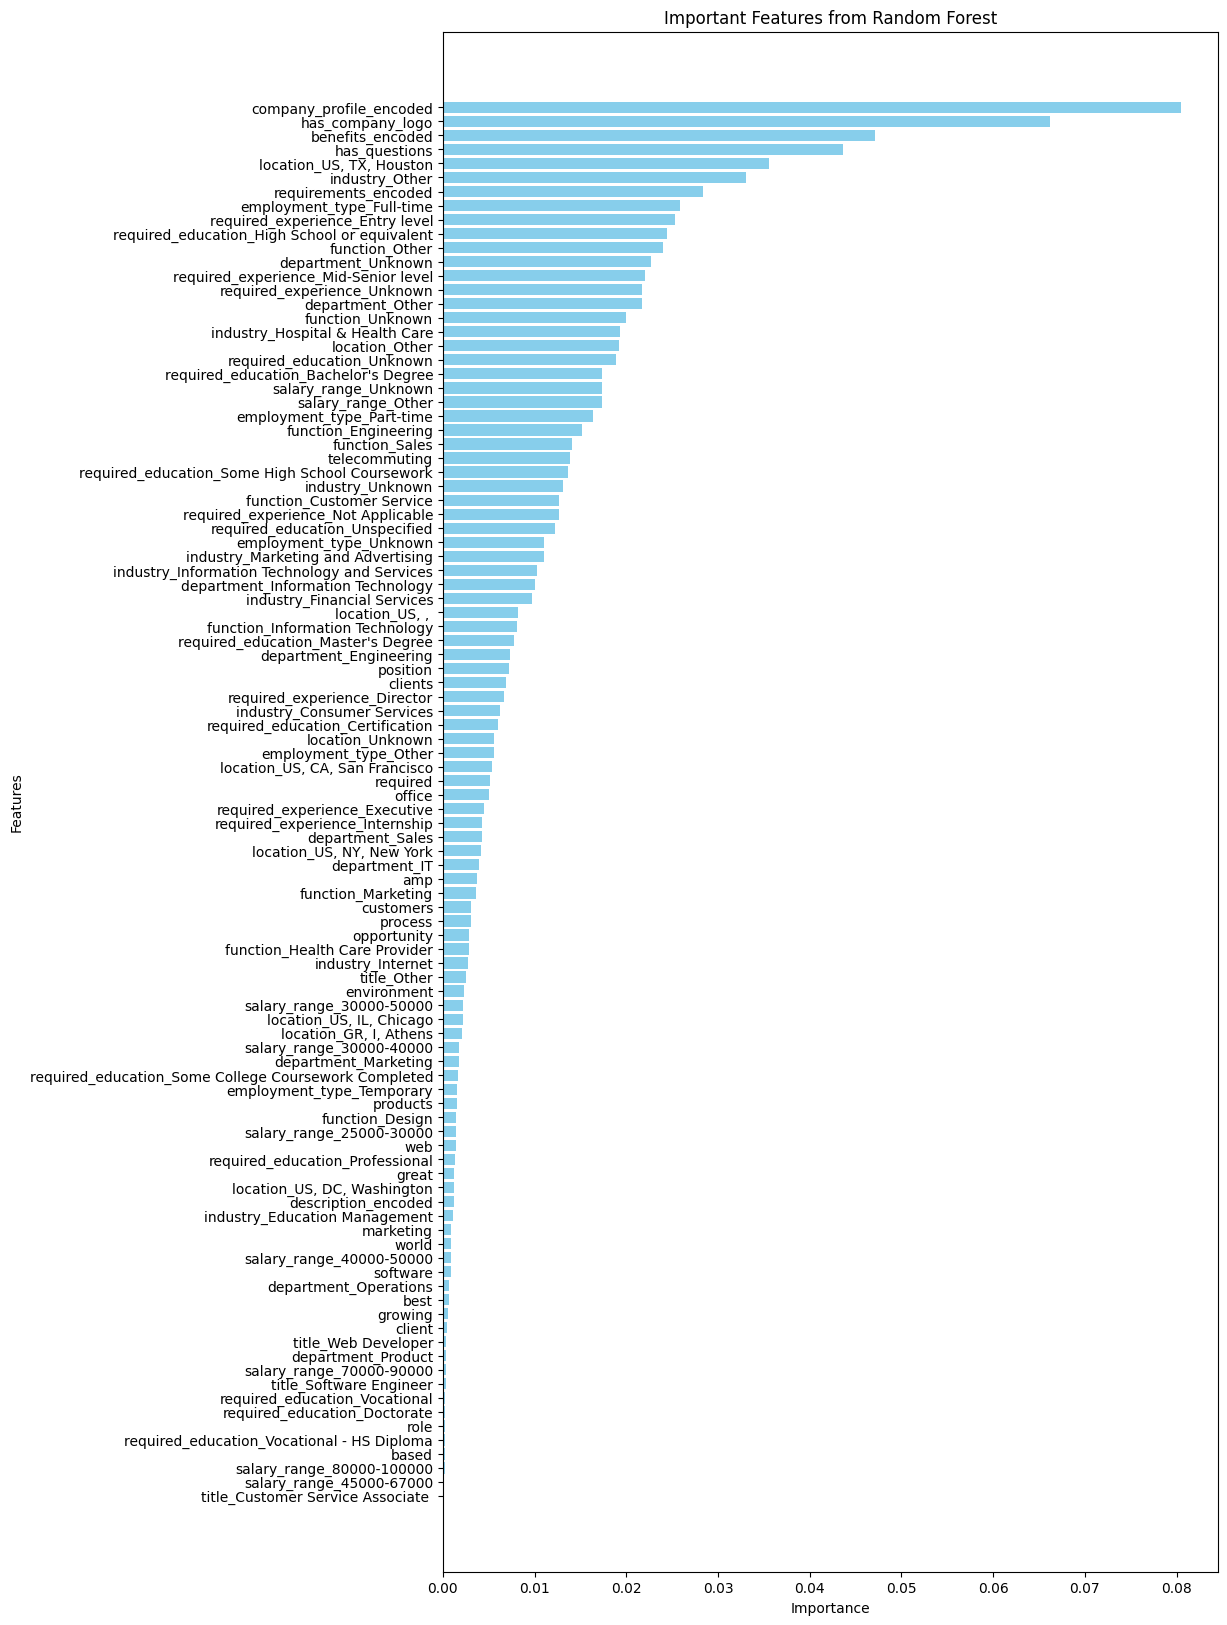

In [44]:
# Creating  DataFrame to store feature names and their scores
feature_importance_rf = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': importances
}) 

# Sort the DataFrame by importance
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)

# Plotting most important features in descending order
plt.figure(figsize=(10, 20))
plt.barh(feature_importance_rf['Feature'][:100], feature_importance_rf['Importance'][:100], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Important Features from Random Forest')

plt.gca().invert_yaxis()  


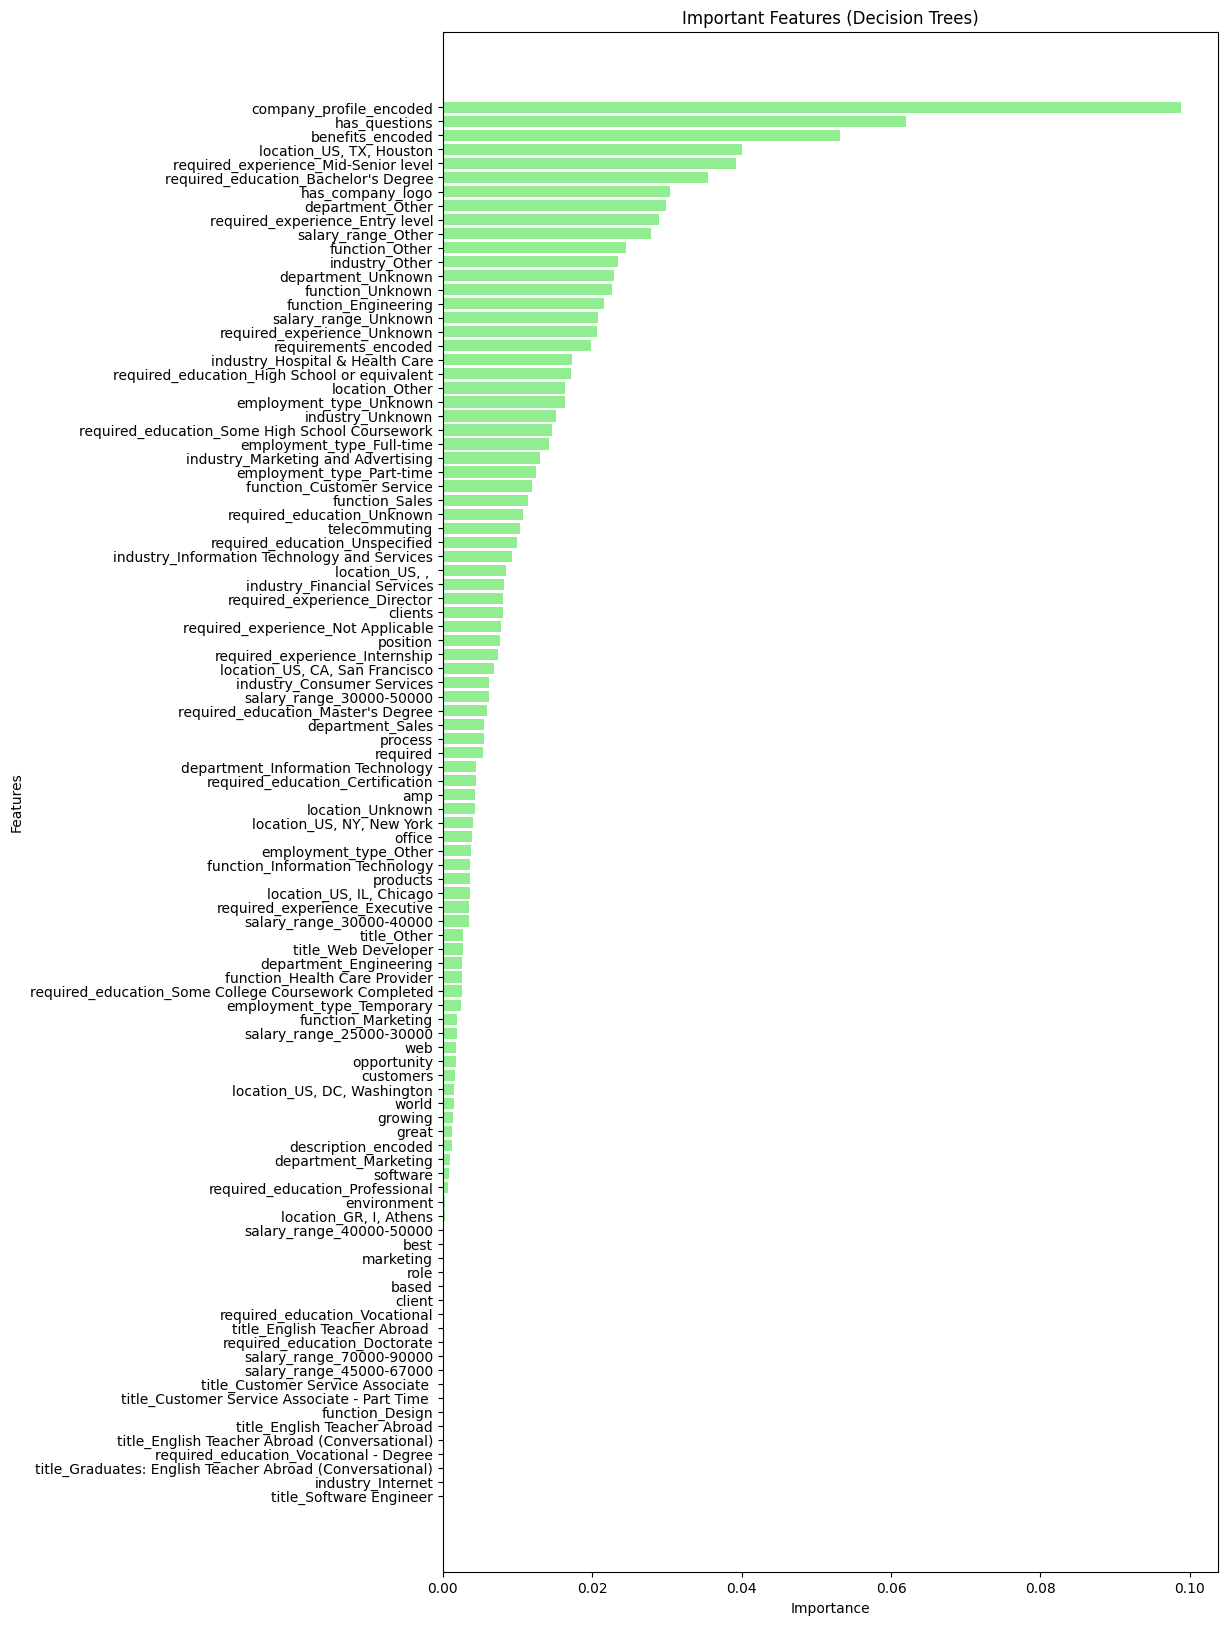

In [45]:


# Fitting Decision tree classifier for Feature selection
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X1, y1)

# Getting feature importances
importances = decision_tree.feature_importances_

# Creating  DataFrame to store feature names and their scores
feature_importance_dt = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)



# Plot the top 10 most important features using a bar plot
plt.figure(figsize=(10, 20))
plt.barh(feature_importance_dt['Feature'][:100], feature_importance_dt['Importance'][:100], color='lightgreen')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Important Features (Decision Trees)')
plt.gca().invert_yaxis()  




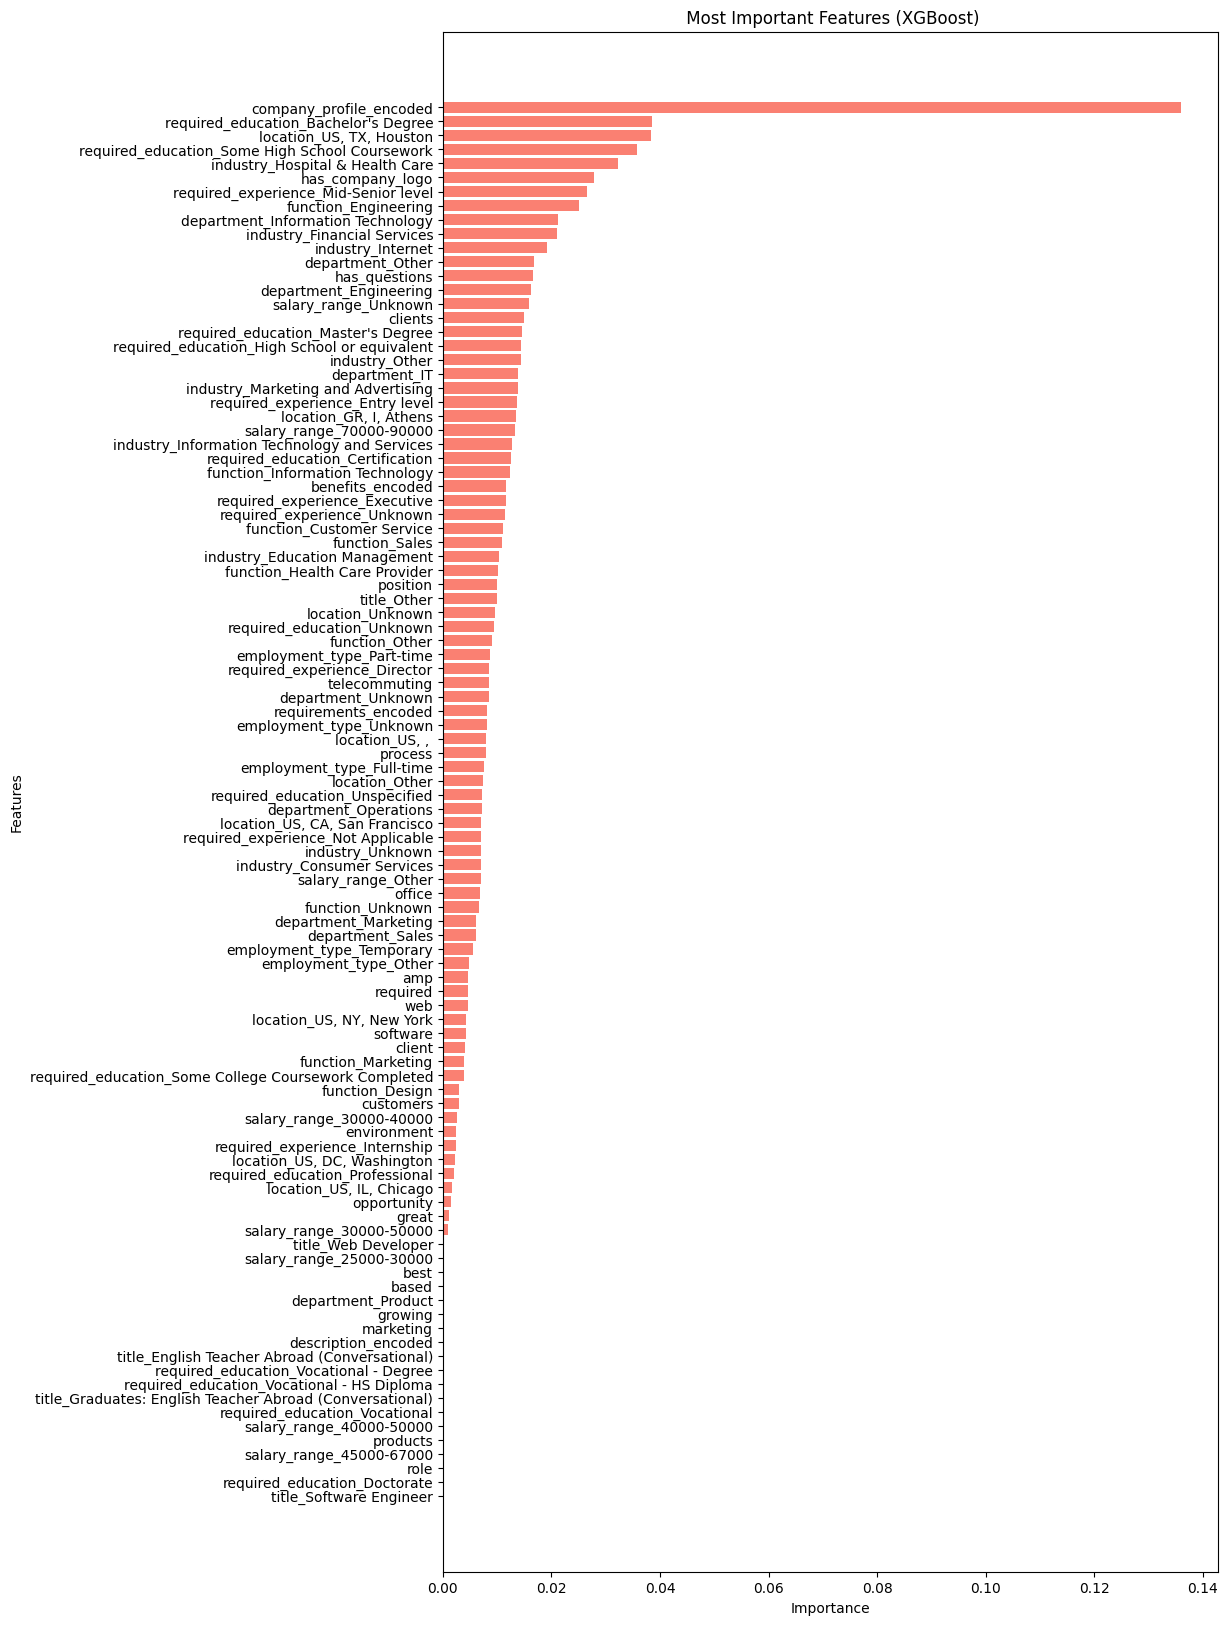

In [46]:

# Fitting XGBoost model for feature selection
model = xgb.XGBClassifier(n_estimators=100, random_state=42)
model.fit(X1, y1)

# Getting feature importances
importances = model.feature_importances_

# Creating  DataFrame to store feature names and their scores
feature_importance_xg = pd.DataFrame({
    'Feature': X1.columns,
    'Importance': importances
})

# Sort the DataFrame by importance
feature_importance_xg = feature_importance_xg.sort_values(by='Importance', ascending=False)


# Plot the top 10 most important features using a bar plot
plt.figure(figsize=(10, 20))
plt.barh(feature_importance_xg['Feature'][:100], feature_importance_xg['Importance'][:100], color='salmon')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title(' Most Important Features (XGBoost)')
plt.gca().invert_yaxis()  # Invert y-axis to show the highest at the top


In [47]:
#  Renaming columns to avoid duplication
feature_importance_xg = feature_importance_xg.rename(columns={'Importance': 'Importance_xg'})

#  Merging the three feature importance scores in a dataframe
merged_feature_importance = pd.merge(
    pd.merge(feature_importance_dt, feature_importance_rf, on='Feature', suffixes=('_dt', '_rf')), 
    feature_importance_xg, on='Feature', suffixes=('', '_xg')
)

merged_feature_importance['Total_Importance'] = merged_feature_importance['Importance_dt'] + merged_feature_importance['Importance_rf'] + merged_feature_importance['Importance_xg']

# Defining the threshold based on visual inspection 
importance_threshold = 0.0020

# Filtering out features where the importance is below the threshold score in all three models
selected_features = merged_feature_importance[
    (merged_feature_importance['Importance_dt'] > importance_threshold) &
    (merged_feature_importance['Importance_rf'] > importance_threshold) &
    (merged_feature_importance['Importance_xg'] > importance_threshold)
]

print(f"Remaining features after Eliminating Feature: {selected_features['Feature'].tolist()}")
subset_features=selected_features['Feature'].tolist()

Remaining features after Eliminating Feature: ['company_profile_encoded', 'has_questions', 'benefits_encoded', 'location_US, TX, Houston', 'required_experience_Mid-Senior level', "required_education_Bachelor's Degree", 'has_company_logo', 'department_Other', 'required_experience_Entry level', 'salary_range_Other', 'function_Other', 'industry_Other', 'department_Unknown', 'function_Unknown', 'function_Engineering', 'salary_range_Unknown', 'required_experience_Unknown', 'requirements_encoded', 'industry_Hospital & Health Care', 'required_education_High School or equivalent', 'location_Other', 'employment_type_Unknown', 'industry_Unknown', 'required_education_Some High School Coursework', 'employment_type_Full-time', 'industry_Marketing and Advertising', 'employment_type_Part-time', 'function_Customer Service', 'function_Sales', 'required_education_Unknown', 'telecommuting', 'required_education_Unspecified', 'industry_Information Technology and Services', 'location_US, , ', 'industry_Fina

In [48]:
len(subset_features)

58

In [49]:
# Step 7: Selection of IDentified featured
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self, selected_features):
        self.selected_features = selected_features
    
    def fit(self, X, y=None):
        return self
    #select the subset of features
    def transform(self, X):
        return X[self.selected_features]

In [50]:
# Combine all the preprocessing steps into a pipeline for seamless transofrmation of Data
preprocessing_pipeline = Pipeline([
    ('fill_missing_values', FillMissingValues()),  
    ('create_missing_indicators', CreateMissingIndicators(descriptive_columns)), 
    ('vectorize_text', VectorizeDescriptiveText(descriptive_columns, max_features=20, common_words=common_words)),  
    ('collapse_high_cardinality', CollapseHighCardinality(columns=high_cardinality_cols , top_n=9)),  
    ('one_hot_encode', OneHotEncodeLowCardinality(max_categories=20)),  
    ('convert_to_integers', ConvertToIntegers()),  
    ('feature_selection', FeatureSelection(subset_features))  
])

In [51]:
# Fitting the pipeline onto training set and transforming the data
preprocessing_pipeline.fit(X_train)
X_train_transformed = preprocessing_pipeline.transform(X_train)
# Transforming the testing set similar to training set
X_test_transformed = preprocessing_pipeline.transform(X_test)



/Users/tusharm/anaconda3/lib/python3.11/site-packages/sklearn/feature_extraction/text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['amp'] not in stop_words.
  warnings.warn(


In [52]:
X_test_transformed

,company_profile_encoded,has_questions,benefits_encoded,"location_US, TX, Houston",required_experience_Mid-Senior level,required_education_Bachelor's Degree,has_company_logo,department_Other,required_experience_Entry level,salary_range_Other,...,amp,location_Unknown,"location_US, NY, New York",office,employment_type_Other,function_Information Technology,required_experience_Executive,title_Other,department_Engineering,function_Health Care Provider
0,1,1,1,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,1,0,0
1,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3571,0,1,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3572,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3573,1,1,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3574,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [53]:
# Saving the preprocessing pipeline to a .pkl file for backend
with open('preprocessing_pipeline_2.pkl', 'wb') as file:
    pickle.dump(preprocessing_pipeline, file)

# Model Training

In [55]:
# Checking class distribution before applying SMOTE
print("Class distribution before SMOTE:")
print(Counter(y_train))

# Applying SMOTE to samples for the minority class(1)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

# Check class distribution after applying SMOTE
print("\nClass distribution after SMOTE:")
print(Counter(y_train_smote))

Class distribution before SMOTE:
Counter({0: 13611, 1: 693})

Class distribution after SMOTE:
Counter({0: 13611, 1: 13611})


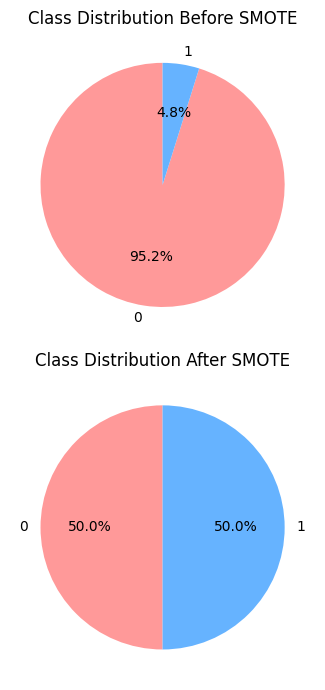

In [72]:
# Create a pie chart to show class distribution before and after SMOTE
fig, axs = plt.subplots(2, 1, figsize=(14, 7))

# Before SMOTE
axs[0].pie(Counter(y_train).values(), labels=Counter(y_train).keys(), autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF'])
axs[0].set_title("Class Distribution Before SMOTE")

# After SMOTE
axs[1].pie(Counter(y_train_smote).values(), labels=Counter(y_train_smote).keys(), autopct='%1.1f%%', startangle=90, colors=['#FF9999','#66B3FF'])
axs[1].set_title("Class Distribution After SMOTE")

# Display the pie charts
plt.tight_layout()
plt.show()

In [56]:

def evaluate_model_with_folds(model, X_test, y_test, n_splits=5):
    #Splitting test data into 5 folds
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_results = {}
    
    for fold, (train_idx, test_idx) in enumerate(skf.split(X_test, y_test), 1):
        X_fold_train, X_fold_test = X_test.iloc[train_idx], X_test.iloc[test_idx]
        y_fold_train, y_fold_test = y_test.iloc[train_idx], y_test.iloc[test_idx]
        
        #predicting
        y_pred = model.predict(X_fold_test)
        y_pred_proba = model.predict_proba(X_fold_test)[:, 1]  # For AUC score
        
        # Confusion matrix
        cm = confusion_matrix(y_fold_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        
        # Metrics
        accuracy = accuracy_score(y_fold_test, y_pred)
        precision = precision_score(y_fold_test, y_pred)
        recall = recall_score(y_fold_test, y_pred)
        f1 = f1_score(y_fold_test, y_pred)
        auc = roc_auc_score(y_fold_test, y_pred_proba)
        
        # Specificity (True Negative Rate)
        specificity = tn / (tn + fp)
        
        # Storing metrics for this fold
        fold_results[f"Fold {fold}"] = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1,
            'specificity': specificity,
            'auc': auc
        }
        
        # Printing metrics for current folds fold
        print(f"Fold {fold}:")
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print(f"AUC: {auc:.4f}")
        print("=========================================")
    
    return fold_results


In [57]:
# Scoring metrics for cross-validation grid search
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1',
    'roc_auc': 'roc_auc'
}


In [58]:



# Hyperparameters for Logistic regression
logistic_params = {
    'C': [0.01, 0.1, 1, 10, 100,1000], 
    'solver': ['liblinear', 'saga'],
    'penalty': ['l1', 'l2'], 
    
}


In [59]:
# Defining How the data will be sampled
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [60]:
# Defining file path for saving pkl file
results_file = "logistic_grid_results.pkl"

# Checking if the pkl file already exists
if os.path.exists(results_file):
    print("Loading saved results from file...")
    with open(results_file, "rb") as file:
        logistic_grid = pickle.load(file)
else:
    print("Results file not found. Running GridSearchCV...")
    
    # Defining the model
    logistic_reg = LogisticRegression(random_state=42, max_iter=100000)

    

    # Define the Grid Search instance 
    logistic_grid = GridSearchCV(
        estimator=logistic_reg,
        param_grid=logistic_params,  
        scoring=scoring,            
        refit='roc_auc',            
        cv=stratified_kfold,
        n_jobs=-1                   
    )
    
    # fit the Grid Search instance
    logistic_grid.fit(X_train_smote, y_train_smote)
    
    # Saving results to a .pkl file
    with open(results_file, "wb") as file:
        pickle.dump(logistic_grid, file)
    print(f"Results saved to {results_file}")

# Identofying the best Logistic Regression model
best_logistic_model = logistic_grid.best_estimator_
print("Best Logistic Regression model:", best_logistic_model)

# Test the  logistic regression model on testing data
print("Logistic Regression Performance:")
logistic_results = evaluate_model_with_folds(best_logistic_model, X_test_transformed, y_test)

Loading saved results from file...
Best Logistic Regression model: LogisticRegression(C=100, max_iter=100000, random_state=42, solver='saga')
Logistic Regression Performance:
Fold 1:
Accuracy: 0.8380
Precision: 0.2086
Recall: 0.8286
F1 Score: 0.3333
Specificity: 0.8385
AUC: 0.8782
Fold 2:
Accuracy: 0.8252
Precision: 0.1773
Recall: 0.7353
F1 Score: 0.2857
Specificity: 0.8297
AUC: 0.8670
Fold 3:
Accuracy: 0.8476
Precision: 0.2137
Recall: 0.8235
F1 Score: 0.3394
Specificity: 0.8488
AUC: 0.8886
Fold 4:
Accuracy: 0.8462
Precision: 0.2093
Recall: 0.7714
F1 Score: 0.3293
Specificity: 0.8500
AUC: 0.8601
Fold 5:
Accuracy: 0.8476
Precision: 0.2109
Recall: 0.7714
F1 Score: 0.3313
Specificity: 0.8515
AUC: 0.8517


In [74]:
logistic_grid.best_estimator_

LogisticRegression(C=100, max_iter=100000, random_state=42, solver='saga')

In [61]:
    # Defining Decision Tree and hyperparameters
decision_tree_params = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [10, 20, 40],
    'criterion': ['gini', 'entropy']
    }

In [62]:
# Defining file path for saving pkl file
decision_tree_results_file = "decision_tree_grid_results.pkl"

# Checking if the pkl file already exists
if os.path.exists(decision_tree_results_file):
    print("Loading saved results from file...")
    with open(decision_tree_results_file, "rb") as file:
        decision_tree_grid = pickle.load(file)
else:
    print("Results file not found. Running GridSearchCV...")

    
    decision_tree = DecisionTreeClassifier(random_state=42)

    # Grid Search with 5-Fold Cross-Validation for Decision Tree
    decision_tree_grid = GridSearchCV(
        estimator=decision_tree,
        param_grid=decision_tree_params,
        scoring=scoring,  
        refit='roc_auc', 
        cv=10,
        n_jobs=-1
    )
    
    # Fit the grid search
    decision_tree_grid.fit(X_train_smote, y_train_smote)
    
    # Save results to a .pkl file
    with open(decision_tree_results_file, "wb") as file:
        pickle.dump(decision_tree_grid, file)
    print(f"Results saved to {decision_tree_results_file}")

# Get the best Decision Tree model
best_tree_model = decision_tree_grid.best_estimator_
print("Best Decision Tree model:", best_tree_model)


# Evaluate the best decision tree model
print("\nDecision Tree Performance:")
tree_dict= evaluate_model_with_folds(best_tree_model, X_test_transformed, y_test)

Loading saved results from file...
Best Decision Tree model: DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=10,
                       random_state=42)

Decision Tree Performance:
Fold 1:
Accuracy: 0.9148
Precision: 0.3243
Recall: 0.6857
F1 Score: 0.4404
Specificity: 0.9266
AUC: 0.8900
Fold 2:
Accuracy: 0.9245
Precision: 0.3571
Recall: 0.7353
F1 Score: 0.4808
Specificity: 0.9339
AUC: 0.9203
Fold 3:
Accuracy: 0.9399
Precision: 0.4308
Recall: 0.8235
F1 Score: 0.5657
Specificity: 0.9457
AUC: 0.9315
Fold 4:
Accuracy: 0.9301
Precision: 0.3913
Recall: 0.7714
F1 Score: 0.5192
Specificity: 0.9382
AUC: 0.8930
Fold 5:
Accuracy: 0.9413
Precision: 0.4493
Recall: 0.8857
F1 Score: 0.5962
Specificity: 0.9441
AUC: 0.9343


In [63]:
 decision_tree_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 20,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [64]:
# XGBoost Hyperparameters
xgboost_params = {
    'n_estimators': [100, 200,300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [30, 50, 70],
    'subsample': [0.8, 1.0],
    
}

# Random Forest Hyperparameters
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# SVM Hyperparameters
svm_params = {
    'C': [0.1, 1, 5],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}

In [65]:

# Defining file path for saving pkl file
xgboost_results_file = "xgboost_grid_results.pkl"

# Checking if the pkl file already exists
if os.path.exists(xgboost_results_file):
    print("Loading saved results from file...")
    with open(xgboost_results_file, "rb") as file:
        xgboost_grid = pickle.load(file)
else:
    print("Results file not found. Running GridSearchCV...")

    

    # Defining XGBoost model
    xgboost = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

   

    # Defining Grid Search for XGBoost
    xgboost_grid = GridSearchCV(
        estimator=xgboost,
        param_grid=xgboost_params,
        scoring=scoring,
        refit='roc_auc',
        cv=stratified_kfold,
        n_jobs=-1
    )
    
    # Fitting the grid search
    xgboost_grid.fit(X_train_smote, y_train_smote)
    
    # Saving results to a .pkl file
    with open(xgboost_results_file, "wb") as file:
        pickle.dump(xgboost_grid, file)
    print(f"Results saved to {xgboost_results_file}")

# Getting the best XGBoost model
xgboost_best = xgboost_grid.best_estimator_

# Predicting on the test set
y_pred_xg = xgboost_best.predict(X_test_transformed)
y_proba_xg = xgboost_best.predict_proba(X_test_transformed)[:, 1]

# Evaluate XGBoost
print("/nXGBoost Performance:")

xgboost_dict = evaluate_model_with_folds(xgboost_best, X_test_transformed, y_test)


Loading saved results from file...
/nXGBoost Performance:
Fold 1:
Accuracy: 0.9497
Precision: 0.4902
Recall: 0.7143
F1 Score: 0.5814
Specificity: 0.9618
AUC: 0.9297
Fold 2:
Accuracy: 0.9371
Precision: 0.4035
Recall: 0.6765
F1 Score: 0.5055
Specificity: 0.9501
AUC: 0.9444
Fold 3:
Accuracy: 0.9538
Precision: 0.5098
Recall: 0.7647
F1 Score: 0.6118
Specificity: 0.9633
AUC: 0.9663
Fold 4:
Accuracy: 0.9497
Precision: 0.4906
Recall: 0.7429
F1 Score: 0.5909
Specificity: 0.9603
AUC: 0.9434
Fold 5:
Accuracy: 0.9497
Precision: 0.4909
Recall: 0.7714
F1 Score: 0.6000
Specificity: 0.9588
AUC: 0.9658


In [66]:
print(xgboost_grid.best_estimator_)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=30,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)


In [80]:
model_filename = "random_forest_grid_results.pkl"



# Checking if the pkl file already exists
if os.path.exists(model_filename):
    print(f"The file {model_filename} already exists. Loading the existing model.")
    with open(model_filename, 'rb') as model_file:
        rf_grid = pickle.load(model_file)
else:
    print("Results file not found. Running GridSearchCV...")
    #setting up
    rf = RandomForestClassifier(random_state=50)
    rf_grid = GridSearchCV(rf, param_grid=rf_params, scoring=scoring,refit='roc_auc', cv=stratified_kfold, n_jobs=-1)
    rf_grid.fit(X_train_smote, y_train_smote)
    # Saving the model to a pkl file
    with open(model_filename, 'wb') as model_file:
        pickle.dump(rf_grid, model_file)
    print(f"Model saved to {model_filename}")



# Getting Best Estimator and Predictions
rf_best = rf_grid.best_estimator_
y_pred_rf = rf_best.predict(X_test_transformed)
y_proba_rf = rf_best.predict_proba(X_test_transformed)[:, 1]

# Evaluate Random Forest Performance
print("Random Forest Performance:")
Rf_dict=evaluate_model_with_folds(rf_best , X_test_transformed, y_test)





The file random_forest_grid_results.pkl already exists. Loading the existing model.
Random Forest Performance:
Fold 1:
Accuracy: 0.9385
Precision: 0.4237
Recall: 0.7143
F1 Score: 0.5319
Specificity: 0.9501
AUC: 0.9245
Fold 2:
Accuracy: 0.9413
Precision: 0.4310
Recall: 0.7353
F1 Score: 0.5435
Specificity: 0.9515
AUC: 0.9437
Fold 3:
Accuracy: 0.9441
Precision: 0.4516
Recall: 0.8235
F1 Score: 0.5833
Specificity: 0.9501
AUC: 0.9735
Fold 4:
Accuracy: 0.9385
Precision: 0.4286
Recall: 0.7714
F1 Score: 0.5510
Specificity: 0.9471
AUC: 0.9479
Fold 5:
Accuracy: 0.9538
Precision: 0.5161
Recall: 0.9143
F1 Score: 0.6598
Specificity: 0.9559
AUC: 0.9791


In [82]:
rf_grid.best_estimator_

RandomForestClassifier(max_depth=20, random_state=42)

In [88]:

# Defining file path for pkl file
svm_results_file = "svm_grid_results.pkl"

# Checking if the pkl file already exists
if os.path.exists(svm_results_file):
    print("Loading saved results from file...")
    with open(svm_results_file, "rb") as file:
        svm_grid = pickle.load(file)
else:
    print("Results file not found. Running GridSearchCV...")

    # Defining SVM model
    svm_model = SVC(probability=True, random_state=42)

  

    # Defining GridSearchCV 
    svm_grid = GridSearchCV(
        estimator=svm_model,
        param_grid=svm_params,
        scoring=scoring,
        refit='roc_auc',
        cv=stratified_kfold,                                
        n_jobs=-1,
        verbose=2
    )

    # Fitting the grid search
    svm_grid.fit(X_train_smote, y_train_smote)

    # Saving results to a .pkl file
    with open(svm_results_file, "wb") as file:
        pickle.dump(svm_grid, file)
    print(f"Results saved to {svm_results_file}")






Loading saved results from file...


In [ ]:

print(svm_best)
svm_results = evaluate_model_with_folds(svm_best, X_test_transformed, y_test)

In [92]:
svm_grid.best_estimator_


SVC(C=0.1, kernel='linear', probability=True, random_state=42)

# Model Evaluation with Statistical Anlaysis

In [ ]:
# Extracting metrics of all the models accross all the folds into list

# Logistic Regression
logistic_auc = [fold['auc'] for fold in logistic_results.values()]
logistic_recall = [fold['recall'] for fold in logistic_results.values()]
logistic_f1 = [fold['f1'] for fold in logistic_results.values()]
logistic_accuracy = [fold['accuracy'] for fold in logistic_results.values()]
logistic_precision = [fold['precision'] for fold in logistic_results.values()]
logistic_specificity = [fold['specificity'] for fold in logistic_results.values()]

# Decision Tree
tree_auc = [fold['auc'] for fold in tree_dict.values()]
tree_recall = [fold['recall'] for fold in tree_dict.values()]
tree_f1 = [fold['f1'] for fold in tree_dict.values()]
tree_accuracy = [fold['accuracy'] for fold in tree_dict.values()]
tree_precision = [fold['precision'] for fold in tree_dict.values()]
tree_specificity = [fold['specificity'] for fold in tree_dict.values()]

# XGBoost
xgboost_auc = [fold['auc'] for fold in xgboost_dict.values()]
xgboost_recall = [fold['recall'] for fold in xgboost_dict.values()]
xgboost_f1 = [fold['f1'] for fold in xgboost_dict.values()]
xgboost_accuracy = [fold['accuracy'] for fold in xgboost_dict.values()]
xgboost_precision = [fold['precision'] for fold in xgboost_dict.values()]
xgboost_specificity = [fold['specificity'] for fold in xgboost_dict.values()]

# Random Forest
rf_auc = [fold['auc'] for fold in Rf_dict.values()]
rf_recall = [fold['recall'] for fold in Rf_dict.values()]
rf_f1 = [fold['f1'] for fold in Rf_dict.values()]
rf_accuracy = [fold['accuracy'] for fold in Rf_dict.values()]
rf_precision = [fold['precision'] for fold in Rf_dict.values()]
rf_specificity = [fold['specificity'] for fold in Rf_dict.values()]

# SVM
svm_auc = [fold['auc'] for fold in svm_results.values()]
svm_recall = [fold['recall'] for fold in svm_results.values()]
svm_f1 = [fold['f1'] for fold in svm_results.values()]
svm_accuracy = [fold['accuracy'] for fold in svm_results.values()]
svm_precision = [fold['precision'] for fold in svm_results.values()]
svm_specificity = [fold['specificity'] for fold in svm_results.values()]


In [ ]:


# Perforing ANOVA for AUC
auc_result = stats.f_oneway(logistic_auc, tree_auc, xgboost_auc, rf_auc, svm_auc)
print("ANOVA results for AUC:", auc_result)

# Performing ANOVA for Recall
recall_result = stats.f_oneway(logistic_recall, tree_recall, xgboost_recall, rf_recall, svm_recall)
print("ANOVA results for Recall:", recall_result)

# Performing ANOVA for F1 Score
f1_result = stats.f_oneway(logistic_f1, tree_f1, xgboost_f1, rf_f1, svm_f1)
print("ANOVA results for F1 Score:", f1_result)

# Performing ANOVA for Accuracy
accuracy_result = stats.f_oneway(logistic_accuracy, tree_accuracy, xgboost_accuracy, rf_accuracy, svm_accuracy)
print("ANOVA results for Accuracy:", accuracy_result)

# Performing ANOVA for Precision
precision_result = stats.f_oneway(logistic_precision, tree_precision, xgboost_precision, rf_precision, svm_precision)
print("ANOVA results for Precision:", precision_result)

# PerformingANOVA for Specificity
specificity_result = stats.f_oneway(logistic_specificity, tree_specificity, xgboost_specificity, rf_specificity, svm_specificity)
print("ANOVA results for Specificity:", specificity_result)

In [ ]:

#Performing paired t-test of Xgboost against all other models
# Paired t-tests for AUC
auc_xgboost_results = {}
auc_xgboost_results['xgboost_vs_logistic'] = ttest_rel(xgboost_auc, logistic_auc)
auc_xgboost_results['xgboost_vs_tree'] = ttest_rel(xgboost_auc, tree_auc)
auc_xgboost_results['xgboost_vs_rf'] = ttest_rel(xgboost_auc, rf_auc)
auc_xgboost_results['xgboost_vs_svm'] = ttest_rel(xgboost_auc, svm_auc)

# Paired t-tests for F1 score 
f1_xgboost_results = {}
f1_xgboost_results['xgboost_vs_logistic'] = ttest_rel(xgboost_f1, logistic_f1)
f1_xgboost_results['xgboost_vs_tree'] = ttest_rel(xgboost_f1, tree_f1)
f1_xgboost_results['xgboost_vs_rf'] = ttest_rel(xgboost_f1, rf_f1)
f1_xgboost_results['xgboost_vs_svm'] = ttest_rel(xgboost_f1, svm_f1)

# Paired t-tests for Accuracy 
accuracy_xgboost_results = {}
accuracy_xgboost_results['xgboost_vs_logistic'] = ttest_rel(xgboost_accuracy, logistic_accuracy)
accuracy_xgboost_results['xgboost_vs_tree'] = ttest_rel(xgboost_accuracy, tree_accuracy)
accuracy_xgboost_results['xgboost_vs_rf'] = ttest_rel(xgboost_accuracy, rf_accuracy)
accuracy_xgboost_results['xgboost_vs_svm'] = ttest_rel(xgboost_accuracy, svm_accuracy)

# Paired t-tests for Precision 
precision_xgboost_results = {}
precision_xgboost_results['xgboost_vs_logistic'] = ttest_rel(xgboost_precision, logistic_precision)
precision_xgboost_results['xgboost_vs_tree'] = ttest_rel(xgboost_precision, tree_precision)
precision_xgboost_results['xgboost_vs_rf'] = ttest_rel(xgboost_precision, rf_precision)
precision_xgboost_results['xgboost_vs_svm'] = ttest_rel(xgboost_precision, svm_precision)

# Paired t-tests for Specificity
specificity_xgboost_results = {}
specificity_xgboost_results['xgboost_vs_logistic'] = ttest_rel(xgboost_specificity, logistic_specificity)
specificity_xgboost_results['xgboost_vs_tree'] = ttest_rel(xgboost_specificity, tree_specificity)
specificity_xgboost_results['xgboost_vs_rf'] = ttest_rel(xgboost_specificity, rf_specificity)
specificity_xgboost_results['xgboost_vs_svm'] = ttest_rel(xgboost_specificity, svm_specificity)


# Displaying the results
print(" T-Test Results for AUC: Xgboost with other models:")
for pair, result in auc_xgboost_results.items():
    print(f"{pair}: t-statistic = {result.statistic}, p-value = {result.pvalue}")

print("\nT-Test Results for F1 score:XGBoost vs Other Models):")
for pair, result in f1_xgboost_results.items():
    print(f"{pair}: t-statistic = {result.statistic}, p-value = {result.pvalue}")

print("\nT-Test Results for Accuracy: XGBoost vs Other Models:")
for pair, result in accuracy_xgboost_results.items():
    print(f"{pair}: t-statistic = {result.statistic}, p-value = {result.pvalue}")

print("\nT-Test Results for Precision: XGBoost vs Other Models:")
for pair, result in precision_xgboost_results.items():
    print(f"{pair}: t-statistic = {result.statistic}, p-value = {result.pvalue}")

print("\nT-Test Results for Specificity: XGBoost vs Other Models:")
for pair, result in specificity_xgboost_results.items():
    print(f"{pair}: t-statistic = {result.statistic}, p-value = {result.pvalue}")

In [ ]:
#t-test for Random forest vs other models

# Paired t-tests for AUC 
auc_rf_results = {}
auc_rf_results['rf_vs_logistic'] = ttest_rel(rf_auc, logistic_auc)
auc_rf_results['rf_vs_tree'] = ttest_rel(rf_auc, tree_auc)
auc_rf_results['rf_vs_svm'] = ttest_rel(rf_auc, svm_auc)

# Paired t-tests for F1 Score 
f1_rf_results = {}
f1_rf_results['rf_vs_logistic'] = ttest_rel(rf_f1, logistic_f1)
f1_rf_results['rf_vs_tree'] = ttest_rel(rf_f1, tree_f1)
f1_rf_results['rf_vs_svm'] = ttest_rel(rf_f1, svm_f1)

# Paired t-tests for Accuracy 
accuracy_rf_results = {}
accuracy_rf_results['rf_vs_logistic'] = ttest_rel(rf_accuracy, logistic_accuracy)
accuracy_rf_results['rf_vs_tree'] = ttest_rel(rf_accuracy, tree_accuracy)
accuracy_rf_results['rf_vs_svm'] = ttest_rel(rf_accuracy, svm_accuracy)

# Paired t-tests for Precision 
precision_rf_results = {}
precision_rf_results['rf_vs_logistic'] = ttest_rel(rf_precision, logistic_precision)
precision_rf_results['rf_vs_tree'] = ttest_rel(rf_precision, tree_precision)

precision_rf_results['rf_vs_svm'] = ttest_rel(rf_precision, svm_precision)
# Paired t-tests for Specificity
specificity_rf_results = {}
specificity_rf_results['rf_vs_logistic'] = ttest_rel(rf_specificity, logistic_specificity)
specificity_rf_results['rf_vs_tree'] = ttest_rel(rf_specificity, tree_specificity)

specificity_rf_results['rf_vs_svm'] = ttest_rel(rf_specificity, svm_specificity)


# Display the results
print("\nT-Test Results for AUC: Random forest with other models:")
for pair, result in auc_rf_results.items():
    print(f"{pair}: t-statistic = {result.statistic}, p-value = {result.pvalue}")

print("\nT-Test Results for F1 score:XGBoost vs Other Models):")
for pair, result in f1_rf_results.items():
    print(f"{pair}: t-statistic = {result.statistic}, p-value = {result.pvalue}")

print("\nT-Test Results for Accuracy: Random Forest vs Other Models:")
for pair, result in accuracy_rf_results.items():
    print(f"{pair}: t-statistic = {result.statistic}, p-value = {result.pvalue}")

print("\nT-Test Results for Precision: Random Forest vs Other Models:")
for pair, result in precision_rf_results.items():
    print(f"{pair}: t-statistic = {result.statistic}, p-value = {result.pvalue}")

print("\nT-Test Results for Specificity: Random Forest vs Other Models:")
for pair, result in specificity_rf_results.items():
    print(f"{pair}: t-statistic = {result.statistic}, p-value = {result.pvalue}")


# implementing Models from Scratch

In [ ]:
# creating Decision tree class, as decision tree acts as a base for Random Forest and Xgboost
class DecisionTree:
    def __init__(self, max_depth=None, min_samples_split=2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.tree = None

    # Training the decision tree classifier by building the tree structure
    def fit(self, X, y):
        self.tree = self._build_tree(X, y)
    
    def _build_tree(self, X, y, depth=0): # using Gini Index for recursively building the tree
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)
        if len(unique_classes) == 1:
            return {"class": unique_classes[0]}
        
        if self.max_depth and depth >= self.max_depth or num_samples < self.min_samples_split:
            return {"class": self._majority_class(y)}
        
        best_split = self._best_split(X, y)
        
        left_tree = self._build_tree(X[best_split["left_indices"]], y[best_split["left_indices"]], depth + 1)
        right_tree = self._build_tree(X[best_split["right_indices"]], y[best_split["right_indices"]], depth + 1)
        
        return {
            "feature": best_split["feature"],
            "threshold": best_split["threshold"],
            "left": left_tree,
            "right": right_tree
        }

    def _best_split(self, X, y):
        best_gini = float("inf")
        best_split = {}
        for feature_idx in range(X.shape[1]):
            thresholds = np.unique(X[:, feature_idx])           
            for threshold in thresholds:
                left_indices = X[:, feature_idx] <= threshold
                right_indices = ~left_indices
                
                left_y = y[left_indices]
                right_y = y[right_indices]
                if len(left_y) < self.min_samples_split or len(right_y) < self.min_samples_split:
                    continue
                
                gini = self._gini_impurity(left_y, right_y)
                
                if gini < best_gini:
                    best_gini = gini
                    best_split = {
                        "feature": feature_idx,
                        "threshold": threshold,
                        "left_indices": left_indices,
                        "right_indices": right_indices
                    }
        
        return best_split
    
# Calculating the gini impurity for the split
    def _gini_impurity(self, left_y, right_y):
        left_size = len(left_y)
        right_size = len(right_y)
        total_size = left_size + right_size       
        left_impurity = 1 - sum([(np.sum(left_y == c) / left_size) ** 2 for c in np.unique(left_y)])
        right_impurity = 1 - sum([(np.sum(right_y == c) / right_size) ** 2 for c in np.unique(right_y)])       
        return (left_size / total_size) * left_impurity + (right_size / total_size) * right_impurity
    
    def _majority_class(self, y):
        return np.bincount(y).argmax()

In [ ]:
#Implementing Random Forest from Scratch
class RandomForest:
    def __init__(self, n_estimators=200, max_depth=20, random_state=50):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.feature_importances_ = None

    # Training the model by fitting n_estimators 
    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []
        self.feature_importances_ = np.zeros(X.shape[1]) 
        
        for _ in range(self.n_estimators):
            #bootstrap sampling
            indices = np.random.choice(len(X), len(X), replace=True)
            X_bootstrap = X.iloc[indices]  
            y_bootstrap = y.iloc[indices]              
            tree = DecisionTreeClassifier(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X_bootstrap, y_bootstrap)
            self.trees.append(tree)
            self.feature_importances_ += tree.feature_importances_
        self.feature_importances_ /= self.n_estimators

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        majority_votes = [np.bincount(pred).argmax() for pred in predictions.T]
        return np.array(majority_votes)

In [ ]:
# Testing the above created random forest class
rf_model = RandomForest_2(n_estimators=200, max_depth=20, random_state=50)
rf_model.fit(X_train_smote, y_train_smote)





In [ ]:
# Making predictions on the test set
y_pred = rf_model.predict(X_test_transformed)

In [ ]:
# Generating metrics for the above random forest model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

# Specificity (True Negative Rate)
specificity = tn / (tn + fp)

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")



In [ ]:
# Save the model to a pkl file 
with open("random_forest_model_2.pkl", "wb") as file:
    pickle.dump(rf_model, file)

print("Model saved as random_forest_model.pkl")

In [ ]:
#checking the class prediction of Random Forest
Counter(y_pred)

In [ ]:
#Testing model.predict on
single_row = X_train[23:26]

single_row

In [ ]:
singlerow_transformed = preprocessing_pipeline.transform(single_row)
singlerow_transformed

In [ ]:
# Predict with the trained model
y_pred_single = rf_model.predict(singlerow_transformed)

# Output the prediction
print(f"Prediction for the single row: {y_pred_single}")

In [ ]:
#implementing Xgboost from scratch
class XGBoostClassification:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=50):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []
        self.feature_importances_ = None

# Training the model with gradient boosting with decision tree
    def fit(self, X, y):
        np.random.seed(self.random_state)
        y_pred = np.zeros_like(y, dtype=np.float64)
        self.feature_importances_ = np.zeros(X.shape[1])
        for i in range(self.n_estimators):
            residuals = self.compute_gradients(y, y_pred)
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X, residuals) 
            y_pred += self.learning_rate * tree.predict(X) 
            self.trees.append(tree)
            self.feature_importances_ += tree.feature_importances_
        self.feature_importances_ /= self.n_estimators

# Computing gradient for logistic loss function
    def compute_gradients(self, y, y_pred):
        probabilities = self.sigmoid(y_pred)
        gradients = probabilities - y 
        return gradients

    def predict(self, X):
        y_pred = np.zeros(X.shape[0], dtype=np.float64)
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X) 
        probabilities = self.sigmoid(y_pred)
        return (probabilities <= 0.5).astype(int) 

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

In [ ]:
# Initialize the model
xg_boost_model = XGBoostClassification(n_estimators=200, learning_rate=0.1, max_depth=50, random_state=50)

# Fit the model on the training data
xg_boost_model.fit(X_train_smote, y_train_smote)

# Make predictions on the test set
y_pred = xg_boost_model.predict(X_test_transformed)



In [ ]:
Counter(y_pred)

In [ ]:


# 2. Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 3. Print the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

In [ ]:
Counter(y_test)

In [ ]:
# Saving the model as a pkl
with open("xgboost_model.pkl", "wb") as file:
    pickle.dump(xg_boost_model, file)

print("Model saved as xgboost_model.pkl")

In [ ]:
# Predict with the trained model
y_pred_single = xg_boost_model.predict(singlerow_transformed)

# Output the prediction
print(f"Prediction for the single row: {y_pred_single}")